In [2]:
#作成したテンソルを読み込み
import torch
X_train = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/X_train.pt')
X_test = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/X_test.pt')
X_valid = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/X_valid.pt')
Y_train = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/Y_train.pt')
Y_test = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/Y_test.pt')
Y_valid = torch.load('/content/drive/MyDrive/Colab Notebooks/chapter08/Y_valid.pt')

In [3]:
# モデルの構築(nnはニューラルネットワーク)
from torch import nn

class SLNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size) #全結合層の作成

    def forward(self, x):
        logits = self.fc(x)                          #フォワードパスの作成
        return logits

#入力300,出力4のサイズでインスタンスを作成
model = SLNet(300, 4)
print(model)

SLNet(
  (fc): Linear(in_features=300, out_features=4, bias=True)
)


In [4]:
# データセットを作成する
import torch.utils.data as data

#データセットのクラスを作成
class NewsDataset(data.Dataset):
    """
    newsのDatasetクラス

    Attributes
    ----------------------------
    X : テンソル
        単語ベクトルの平均をまとめたテンソル
    y : テンソル
        カテゴリをラベル化したテンソル
    phase : 'train' or 'val'
        学習か訓練かを設定する
    """
    def __init__(self, X, y, phase='train'):
        self.X = X
        self.y = y
        self.phase = phase

    def __len__(self):
        """全データサイズを返す"""
        return len(self.y)

    def __getitem__(self, idx):
        """idxに対応するテンソル形式のデータとラベルを取得"""
        return self.X[idx], self.y[idx]

train_dataset = NewsDataset(X_train, Y_train, phase='train')
valid_dataset = NewsDataset(X_valid, Y_valid, phase='val')
test_dataset = NewsDataset(X_test, Y_test, phase='val')

# 動作確認
idx = 0
print(train_dataset.__getitem__(idx)[0].size())
print(train_dataset.__getitem__(idx)[1])
print(valid_dataset.__getitem__(idx)[0].size())
print(valid_dataset.__getitem__(idx)[1])
print(test_dataset.__getitem__(idx)[0].size())
print(test_dataset.__getitem__(idx)[1])

torch.Size([300])
tensor(2)
torch.Size([300])
tensor(3)
torch.Size([300])
tensor(2)


In [5]:
# DataLoaderを作成(Dataloaderはdatasetsからバッチごとに取り出すことを目的とする)
batch_size = 1

train_dataloader = data.DataLoader(                                              #ここには10671個のバッチが含まれている
            train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = data.DataLoader(
            valid_dataset, batch_size=len(valid_dataset), shuffle=False)
test_dataloader = data.DataLoader(
            test_dataset, batch_size=len(test_dataset), shuffle=False)

dataloaders_dict = {'train': train_dataloader,
                    'val': valid_dataloader,
                    'test': test_dataloader,
                   }

# 動作確認
batch_iter = iter(dataloaders_dict['train']) #バッチからデータを取り出す
inputs, labels = next(batch_iter)
print(inputs.size())
print(labels)

torch.Size([1, 300])
tensor([2])


Epoch 1 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:08<00:00, 1254.29it/s]


train Loss: 0.4164, Acc: 0.8594


100%|██████████| 1/1 [00:00<00:00, 40.99it/s]


val Loss: 0.3149, Acc: 0.8913


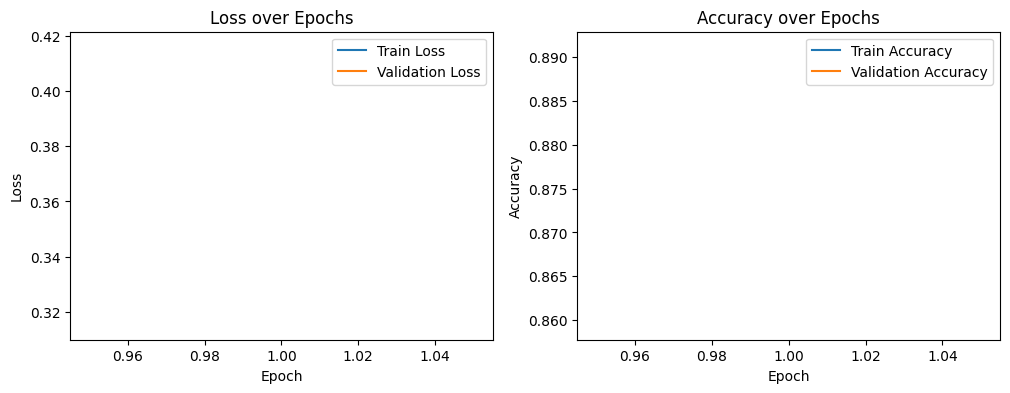

Epoch 2 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:08<00:00, 1249.71it/s]


train Loss: 0.3108, Acc: 0.8913


100%|██████████| 1/1 [00:00<00:00, 41.75it/s]


val Loss: 0.2821, Acc: 0.9093


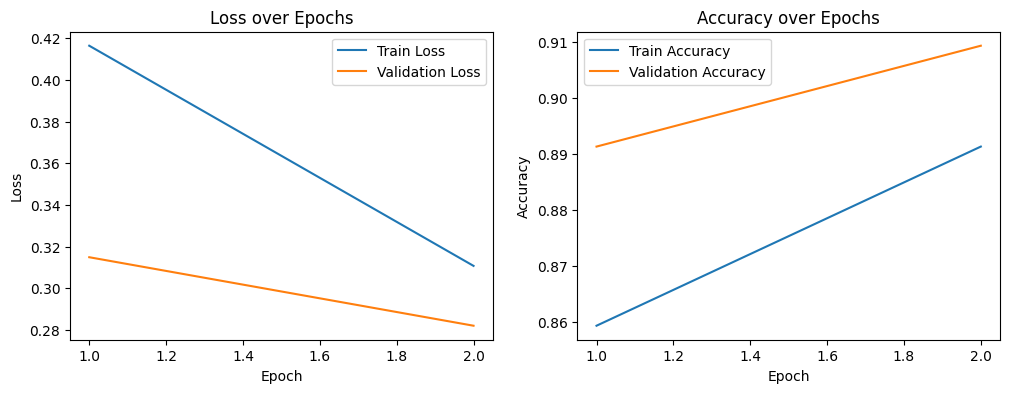

Epoch 3 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:09<00:00, 1159.28it/s]


train Loss: 0.2890, Acc: 0.8991


100%|██████████| 1/1 [00:00<00:00, 51.03it/s]


val Loss: 0.2811, Acc: 0.9070


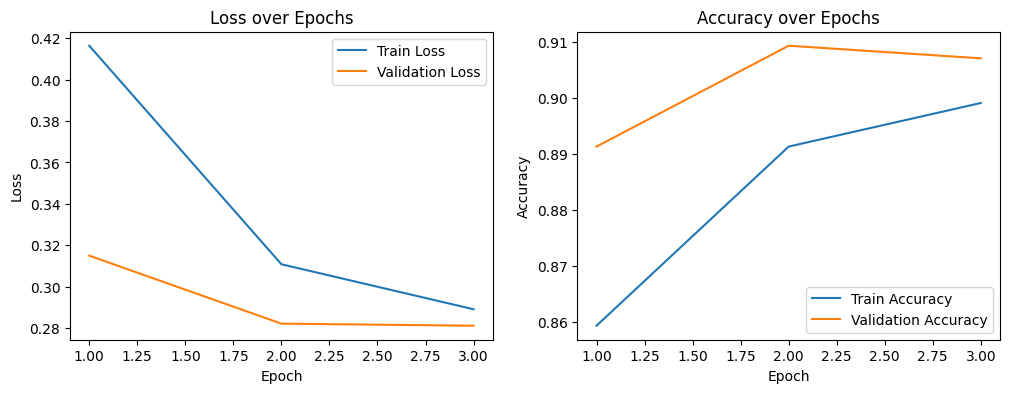

Epoch 4 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:08<00:00, 1307.95it/s]


train Loss: 0.2799, Acc: 0.9030


100%|██████████| 1/1 [00:00<00:00, 32.25it/s]


val Loss: 0.2700, Acc: 0.9093


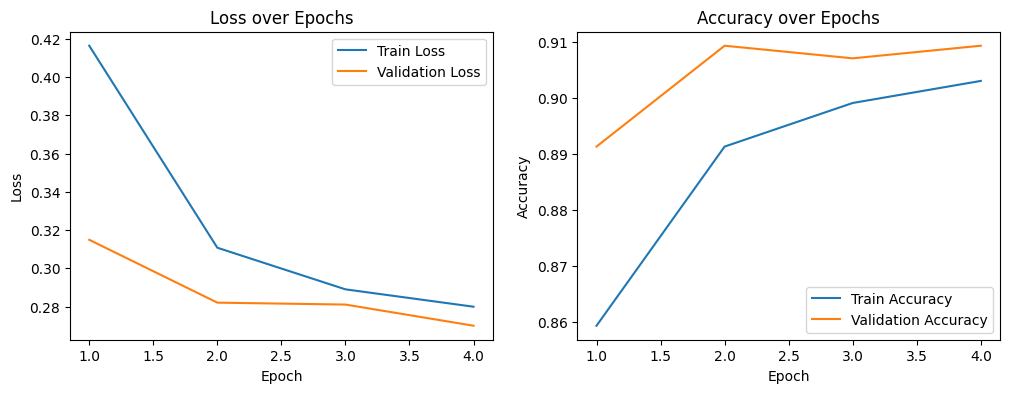

Epoch 5 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:08<00:00, 1192.39it/s]


train Loss: 0.2699, Acc: 0.9063


100%|██████████| 1/1 [00:00<00:00, 40.54it/s]


val Loss: 0.2838, Acc: 0.9010


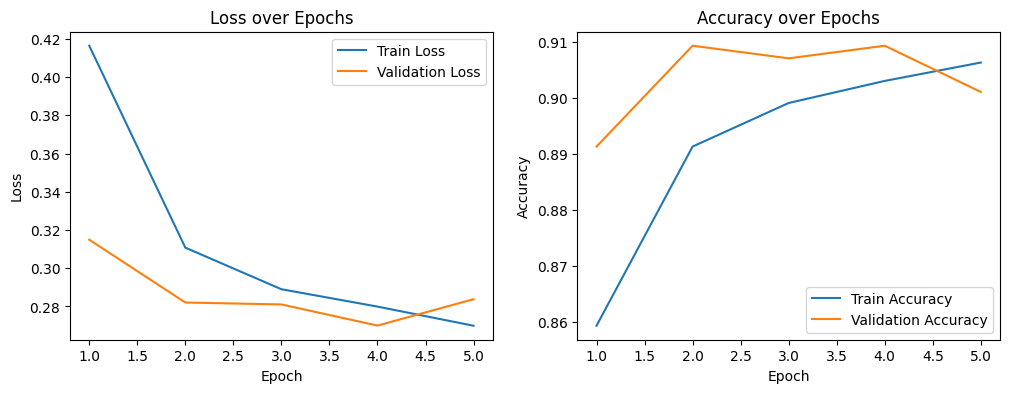

Epoch 6 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:09<00:00, 1131.96it/s]


train Loss: 0.2668, Acc: 0.9071


100%|██████████| 1/1 [00:00<00:00, 46.51it/s]


val Loss: 0.2767, Acc: 0.9108


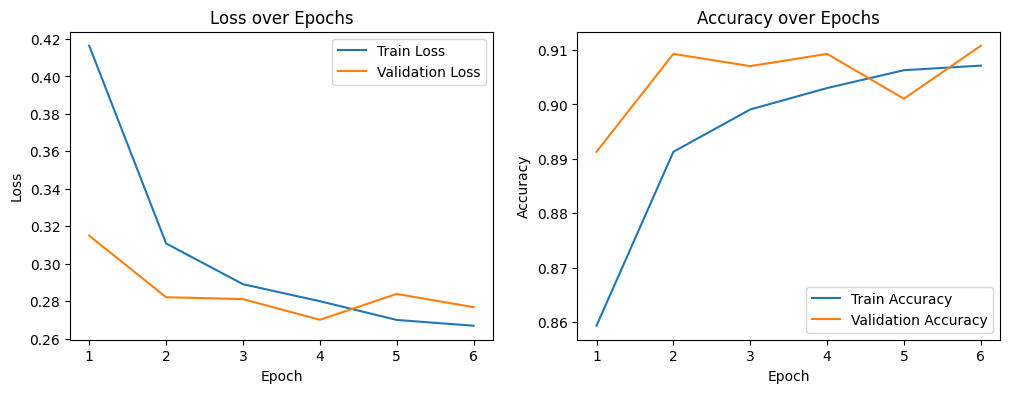

Epoch 7 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:07<00:00, 1342.14it/s]


train Loss: 0.2611, Acc: 0.9087


100%|██████████| 1/1 [00:00<00:00, 33.12it/s]


val Loss: 0.2714, Acc: 0.9138


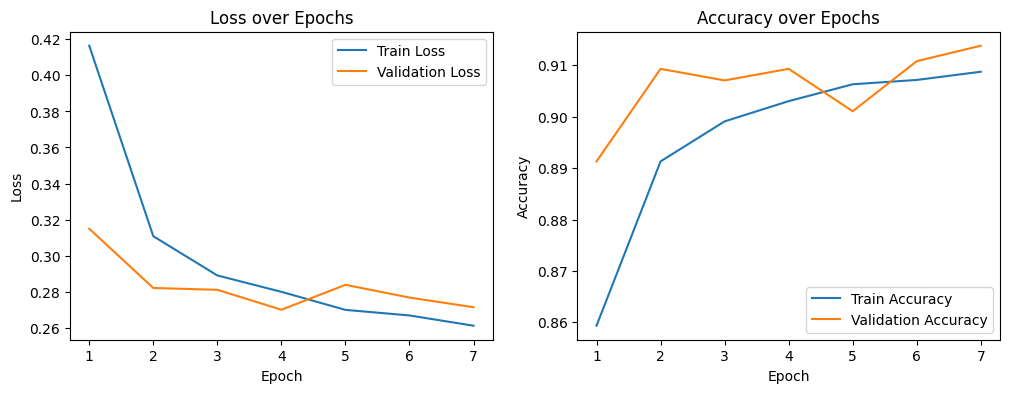

Epoch 8 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:09<00:00, 1135.65it/s]


train Loss: 0.2589, Acc: 0.9105


100%|██████████| 1/1 [00:00<00:00, 36.87it/s]


val Loss: 0.2713, Acc: 0.9085


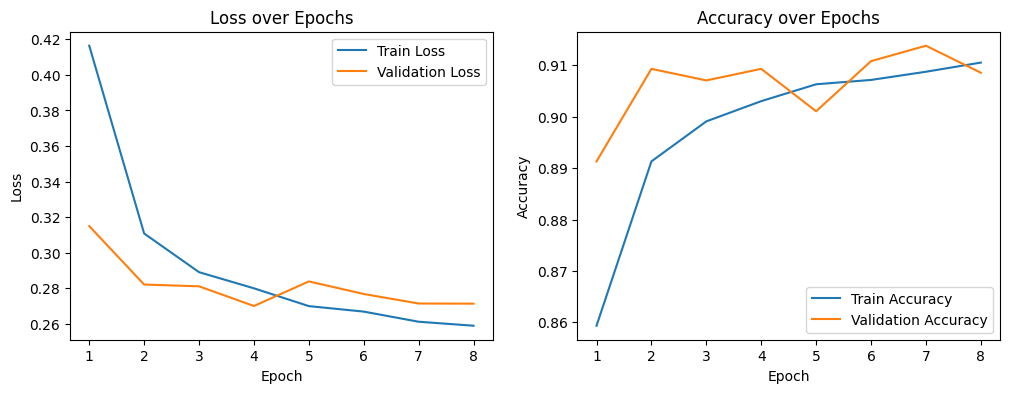

Epoch 9 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:11<00:00, 965.26it/s] 


train Loss: 0.2547, Acc: 0.9119


100%|██████████| 1/1 [00:00<00:00, 42.46it/s]


val Loss: 0.2725, Acc: 0.9100


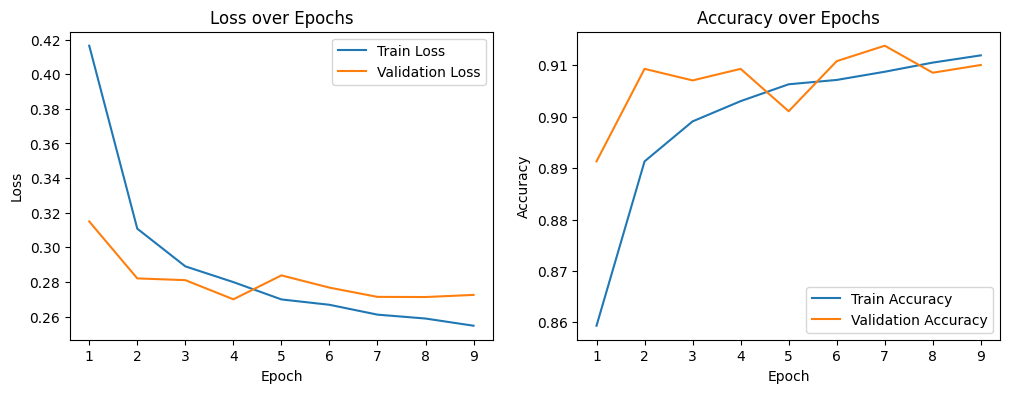

Epoch 10 / 10
--------------------------------------------


100%|██████████| 10672/10672 [00:09<00:00, 1116.56it/s]


train Loss: 0.2528, Acc: 0.9133


100%|██████████| 1/1 [00:00<00:00, 23.33it/s]


val Loss: 0.2739, Acc: 0.9100


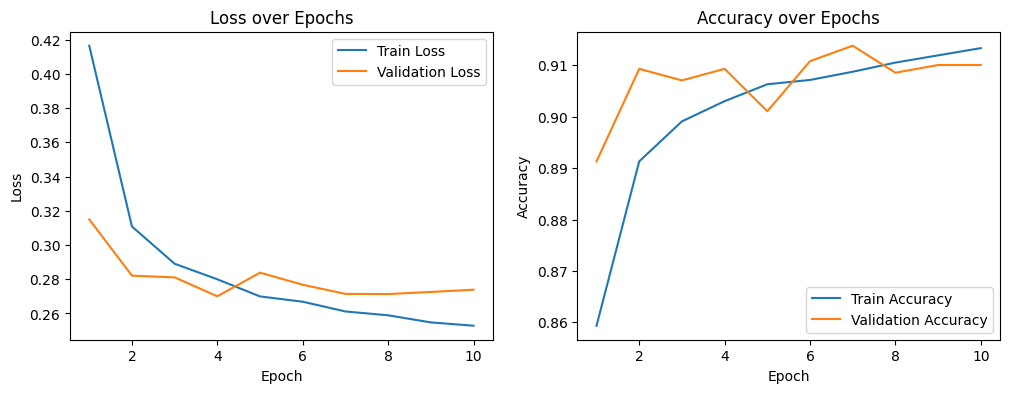

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# 学習用の関数を定義
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    # epochのループ
    for epoch in range(num_epochs):
        print('Epoch {} / {}'.format(epoch + 1, num_epochs))
        print('--------------------------------------------')

        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train() # 訓練モード
            else:
                net.eval() # 検証モード

            epoch_loss = 0.0 # epochの損失和
            epoch_corrects = 0 # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                optimizer.zero_grad() # optimizerを初期化

                # 順伝播計算(forward)
                with torch.set_grad_enabled(phase == 'train'):     #訓練モードの時に勾配計算を有効にする
                    outputs = net(inputs)
                    loss = criterion(outputs, labels) # 損失を計算
                    _, preds = torch.max(outputs, 1) # ラベルを予想

                    # 訓練時は逆伝播
                    if phase == 'train':
                        loss.backward()  #誤差逆伝播
                        optimizer.step() #パラメータの更新

                    # イテレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率の表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc.item())
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc.item())

            print('{} Loss: {:.4f}, Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        # 損失と精度のグラフをプロット
        epochs_range = range(1, epoch + 2)

        plt.figure(figsize=(12, 4))

        #Lossに関するグラフの描画
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_loss, label='Train Loss')
        plt.plot(epochs_range, valid_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss over Epochs')
        plt.legend()

        #Accuracyに関するグラフの描画
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_acc, label='Train Accuracy')
        plt.plot(epochs_range, valid_acc, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy over Epochs')
        plt.legend()

        plt.show()

    return train_loss, train_acc, valid_loss, valid_acc

# モデルの定義 (SLNetの定義が必要)
net = SLNet(300, 4)
net.train()

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# 最適化手法の定義
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
train_loss, train_acc, valid_loss, valid_acc = train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)
